In [1]:
!pip install -q pymcel

08.08.23

In [7]:
from astroquery.jplhorizons import Horizons
import pandas as pd

In [21]:
earth_busca=Horizons(id='Geocenter',location='@Sun',
         epochs=dict(start='2023-01-01 00:00:00',stop='2023-12-31 00:00:00',step='1d'))  #Geocenter, para no generar conflicto con otras cosas. El start debe ser antes del stop

In [22]:
earth=earth_busca.vectors().to_pandas()  #Parece dataframe, pero es una tabla de astropy. Se puede convertir a dataframe
earth

,targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate
0,Earth (399),2459945.5,A.D. 2023-Jan-01 00:00:00.0000,-0.170256,0.968485,-0.000049,-0.017220,-0.003050,-3.690455e-07,0.005679,0.983337,-0.000022
1,Earth (399),2459946.5,A.D. 2023-Jan-02 00:00:00.0000,-0.187448,0.965286,-0.000049,-0.017164,-0.003350,-3.582957e-07,0.005679,0.983318,-0.000016
2,Earth (399),2459947.5,A.D. 2023-Jan-03 00:00:00.0000,-0.204581,0.961787,-0.000050,-0.017102,-0.003648,-3.172449e-07,0.005679,0.983304,-0.000010
3,Earth (399),2459948.5,A.D. 2023-Jan-04 00:00:00.0000,-0.221650,0.957990,-0.000050,-0.017035,-0.003946,-2.486306e-07,0.005679,0.983297,-0.000004
4,Earth (399),2459949.5,A.D. 2023-Jan-05 00:00:00.0000,-0.238649,0.953896,-0.000050,-0.016963,-0.004242,-1.559305e-07,0.005679,0.983296,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...
360,Earth (399),2460305.5,A.D. 2023-Dec-27 00:00:00.0000,-0.079157,0.980260,-0.000057,-0.017421,-0.001449,-2.193219e-08,0.005680,0.983451,-0.000042
361,Earth (399),2460306.5,A.D. 2023-Dec-28 00:00:00.0000,-0.096565,0.978659,-0.000057,-0.017394,-0.001752,1.307207e-07,0.005680,0.983412,-0.000036
362,Earth (399),2460307.5,A.D. 2023-Dec-29 00:00:00.0000,-0.113944,0.976756,-0.000056,-0.017362,-0.002055,2.833750e-07,0.005680,0.983379,-0.000029
363,Earth (399),2460308.5,A.D. 2023-Dec-30 00:00:00.0000,-0.131288,0.974549,-0.000056,-0.017325,-0.002357,4.298540e-07,0.005679,0.983353,-0.000023


In [23]:
earth[['x','y','z']]  #buscar las unidades en la tabla de astropy [x]=AU

,x,y,z
0,-0.170256,0.968485,-0.000049
1,-0.187448,0.965286,-0.000049
2,-0.204581,0.961787,-0.000050
3,-0.221650,0.957990,-0.000050
4,-0.238649,0.953896,-0.000050
...,...,...,...
360,-0.079157,0.980260,-0.000057
361,-0.096565,0.978659,-0.000057
362,-0.113944,0.976756,-0.000056
363,-0.131288,0.974549,-0.000056


In [24]:
from astropy import constants   #puedo buscar constantes

In [25]:
au=constants.au.value
msun=constants.M_sun.value
mearth=constants.M_earth.value
G=constants.G.value

In [26]:
import numpy as np

In [27]:
r_earth=np.array(earth[['x','y','z']]*au)

In [28]:
r_earth

array([[-2.54699305e+10,  1.44883365e+11, -7.30939320e+06],
       [-2.80418811e+10,  1.44404696e+11, -7.36418895e+06],
       [-3.06049407e+10,  1.43881253e+11, -7.41508123e+06],
       ...,
       [-1.70457588e+10,  1.46120546e+11, -8.43687198e+06],
       [-1.96403915e+10,  1.45790492e+11, -8.38341110e+06],
       [-2.22290616e+10,  1.45415238e+11, -8.30883538e+06]])

In [29]:
import matplotlib.pyplot as plt

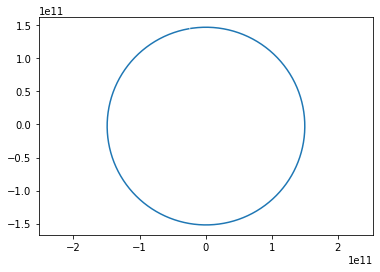

In [32]:
plt.plot(r_earth[:,0],r_earth[:,1])
plt.axis('equal');

In [ ]:
#Buscar la convención para los cuerpos en astroquery